In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Elektricke energie_bilance_final.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            12 non-null     int64
 1   Vyroba_e        12 non-null     int64
 2   p_elektrarny    12 non-null     int64
 3   vod_elektrarny  12 non-null     int64
 4   vet_elektrarny  12 non-null     int64
 5   sol_elektrarny  12 non-null     int64
 6   J_elektrarny    12 non-null     int64
dtypes: int64(7)
memory usage: 768.0 bytes


In [114]:
df

,year,Vyroba_e,p_elektrarny,vod_elektrarny,vet_elektrarny,sol_elektrarny,J_elektrarny
id,,,,,,,
1,2010,85903,53574,3380,335,616,27998
2,2011,87477,53951,2664,397,2182,28283
3,2012,87418,51669,2860,416,2149,30324
4,2013,86913,50015,3639,481,2033,30745
5,2014,86148,50262,2961,477,2123,30325
6,2015,83892,51143,3071,573,2264,26841
7,2016,83309,53375,3202,497,2131,24104
8,2017,87050,52886,3040,591,2193,28340
9,2018,88032,52464,2679,609,2359,29921


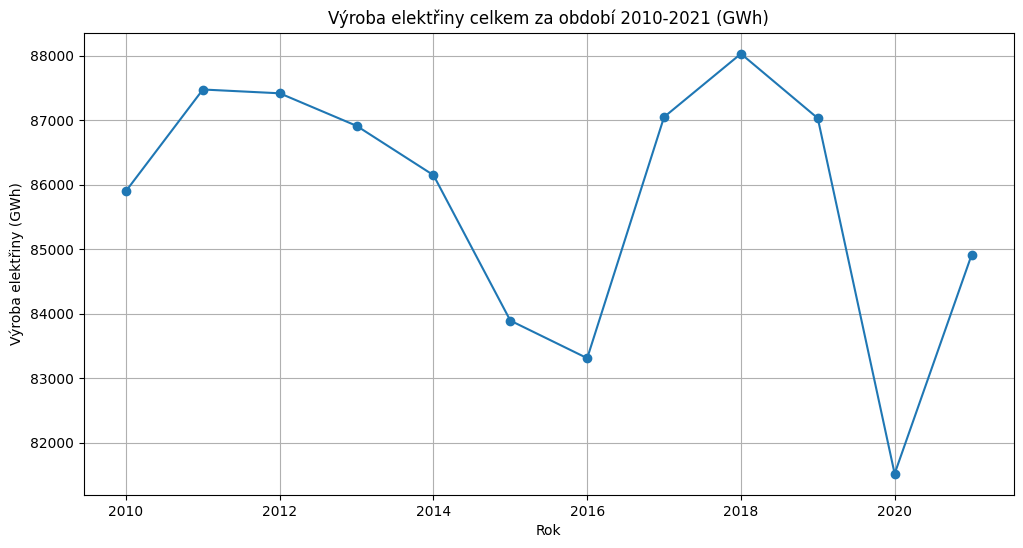

In [115]:
df.set_index("year", inplace=True)
df["Vyroba_e"].plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Výroba elektřiny celkem za období 2010-2021 (GWh)")
plt.xlabel("Rok")
plt.ylabel("Výroba elektřiny (GWh)")
plt.grid(True)

In [116]:
sources = [
    "p_elektrarny",
    "vod_elektrarny",
    "vet_elektrarny",
    "sol_elektrarny",
    "J_elektrarny",
]
avg_production_by_source = df[sources].mean()
avg_production_by_source

p_elektrarny      51065.750000
vod_elektrarny     3144.000000
vet_elektrarny      531.416667
sol_elektrarny     2066.833333
J_elektrarny      28991.750000
dtype: float64

In [117]:
highest_production_year = df["Vyroba_e"].idxmax()
lowest_production_year = df["Vyroba_e"].idxmin()
f"Year with the highest production: {highest_production_year}"
f"Year with the lowest production: {lowest_production_year}"

'Year with the lowest production: 2020'

In [118]:
def calc_percentage(row, source):
    total_production = row["Vyroba_e"]
    percentage = (row[source] / total_production) * 100
    return percentage


sources = sources

for source in sources:
    percentage_column_name = f"{source}_percentage"
    percentages = []

    for index, row in df.iterrows():
        percentage = calc_percentage(row, source)
        percentages.append(round(percentage, 2))

    df[percentage_column_name] = percentages

df

,Vyroba_e,p_elektrarny,vod_elektrarny,vet_elektrarny,sol_elektrarny,J_elektrarny,p_elektrarny_percentage,vod_elektrarny_percentage,vet_elektrarny_percentage,sol_elektrarny_percentage,J_elektrarny_percentage
year,,,,,,,,,,,
2010,85903,53574,3380,335,616,27998,62.37,3.93,0.39,0.72,32.59
2011,87477,53951,2664,397,2182,28283,61.67,3.05,0.45,2.49,32.33
2012,87418,51669,2860,416,2149,30324,59.11,3.27,0.48,2.46,34.69
2013,86913,50015,3639,481,2033,30745,57.55,4.19,0.55,2.34,35.37
2014,86148,50262,2961,477,2123,30325,58.34,3.44,0.55,2.46,35.20
2015,83892,51143,3071,573,2264,26841,60.96,3.66,0.68,2.70,31.99
2016,83309,53375,3202,497,2131,24104,64.07,3.84,0.60,2.56,28.93
2017,87050,52886,3040,591,2193,28340,60.75,3.49,0.68,2.52,32.56
2018,88032,52464,2679,609,2359,29921,59.60,3.04,0.69,2.68,33.99


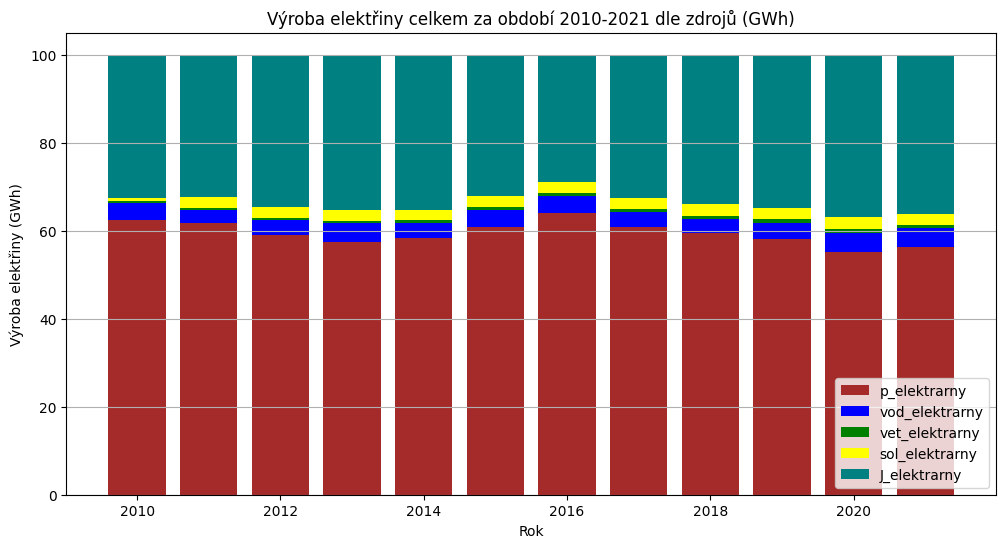

In [120]:
df.reset_index(inplace=True)
x = df["year"]
y1 = np.array(df["p_elektrarny_percentage"])
y2 = np.array(df["vod_elektrarny_percentage"])
y3 = np.array(df["vet_elektrarny_percentage"])
y4 = np.array(df["sol_elektrarny_percentage"])
y5 = np.array(df["J_elektrarny_percentage"])

plt.figure(figsize=(12, 6))
plt.bar(x, y1, color="brown")
plt.bar(x, y2, bottom=y1, color="blue")
plt.bar(x, y3, bottom=y1 + y2, color="green")
plt.bar(x, y4, bottom=y1 + y2 + y3, color="yellow")
plt.bar(x, y5, bottom=y1 + y2 + y3 + y4, color="teal")

plt.title("Výroba elektřiny celkem za období 2010-2021 dle zdrojů (GWh)")
plt.xlabel("Rok")
plt.ylabel("Výroba elektřiny (GWh)")
plt.legend(
    [
        "p_elektrarny",
        "vod_elektrarny",
        "vet_elektrarny",
        "sol_elektrarny",
        "J_elektrarny",
    ],
    loc="lower right",
)
plt.grid(axis="y")